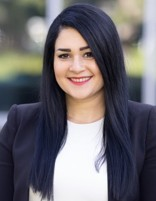
---
---
---

### Project Title: Auto MPG
### Prepared by: Sona Shakoory
### Program: MIT Professional Education – Applied Data Science
### Unsupervised Learning: Dimensionality Reduction Analysis Using PCA and t-SNE
---
---
## **Context**
---

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

---


Lets start by importing the required libraries

---

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---


The next step is to examine the data structure. The Excel file has been saved in my Google Drive under the "Elective Project" folder.


---



In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/Elective Project/auto-mpg.csv')
# returns the first 5 rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
# returns the last 5 rows
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10


In [ ]:
# Return the total number of rows and columns in the dataset
df.shape

(398, 8)

In [ ]:
# Print a summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


---
**Data Summary**

* Total Records: 398 entries
* Total Columns: 8 features
* 6 numeric (mpg, cylinders, displacement, weight, acceleration, model year)
* 2 object-type (horsepower, car name)
---
**Completeness**

* All columns have 398 non-null values — no missing data reported.
* Horsepower is stored as an object; likely contains non-numeric characters and requires cleaning for numerical analysis.
---

## **Data Preprocessing and Exploratory Data Analysis**


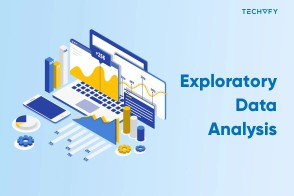


In [ ]:
df["car name"].nunique()

305

In [ ]:
# Make a copy to avoid modifying the original dataset
dfnew = df.copy()

# Dropping the column 'car name'
df = df.drop(['car name'], axis = 1)

In [ ]:
# Identify entries in the 'horsepower' column that contain non-digit characters

hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())

df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


---
**Observations**
* There are 6 entries in the 'horsepower' column with '?', which should be treated as missing values.
* To prepare the data for analysis:

  * Replace '?' with np.nan to standardize missing entries.
  * Impute the missing values as appropriate (e.g., mean, median).
  * Convert the 'horsepower' column to a numeric data type.
---

In [ ]:
# Replacing ? with np.nan
df = df.replace('?', np.nan)

df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


### **Summary Statistics**

In [ ]:
df['horsepower'] = df['horsepower'].astype('float64')  # Convert 'horsepower' to float for modeling

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()) # Fill missing 'horsepower' values using median for robustness against outliers

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


mpg
Skew: 0.46


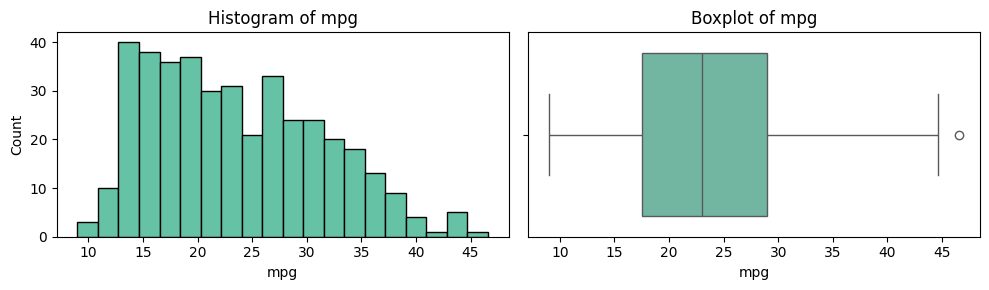

cylinders
Skew: 0.53


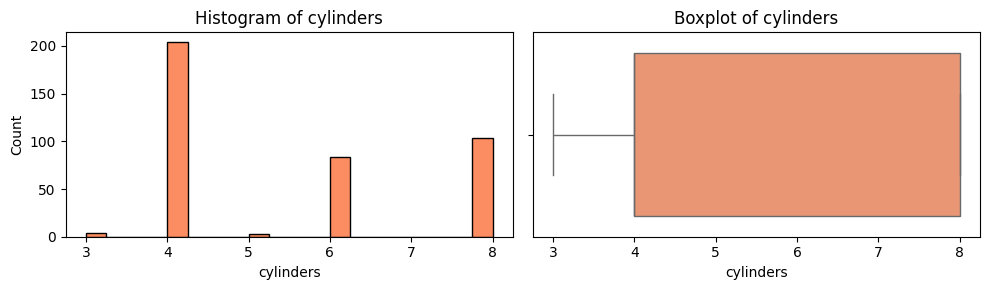

displacement
Skew: 0.72


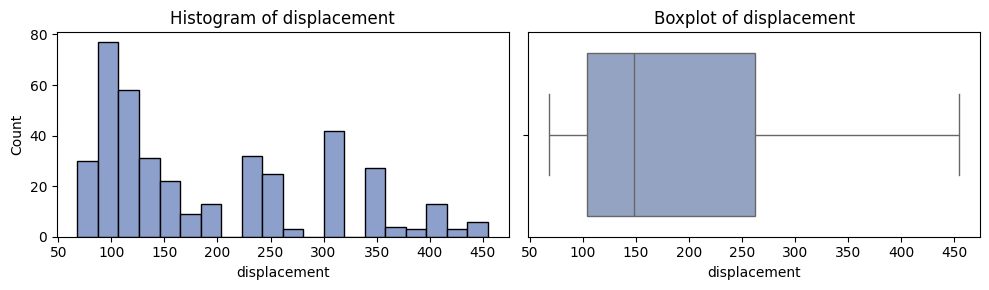

horsepower
Skew: 1.11


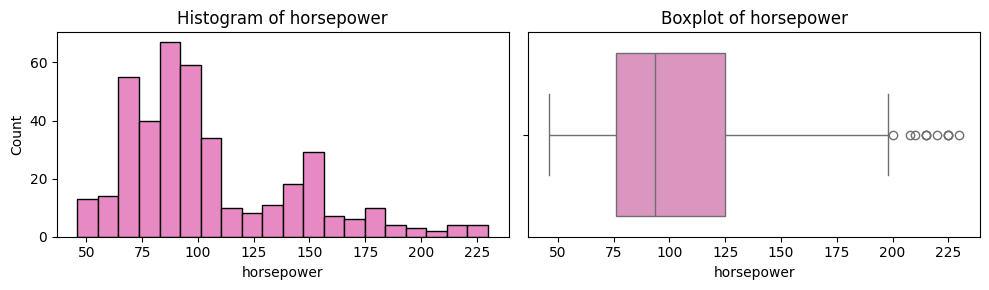

weight
Skew: 0.53


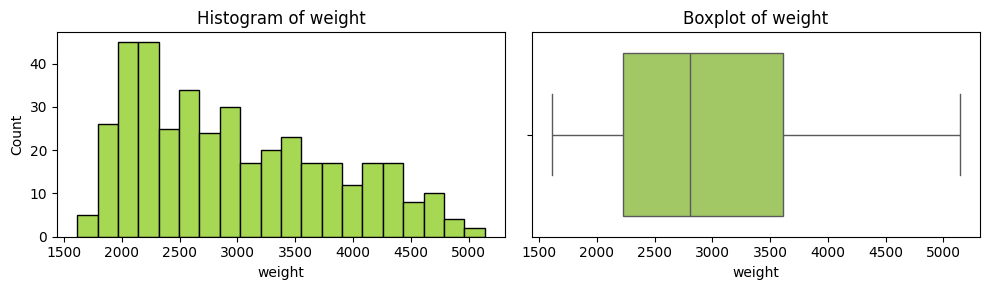

acceleration
Skew: 0.28


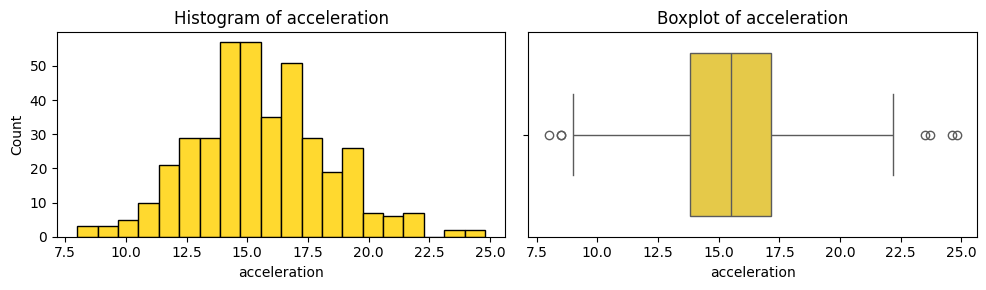

model year
Skew: 0.01


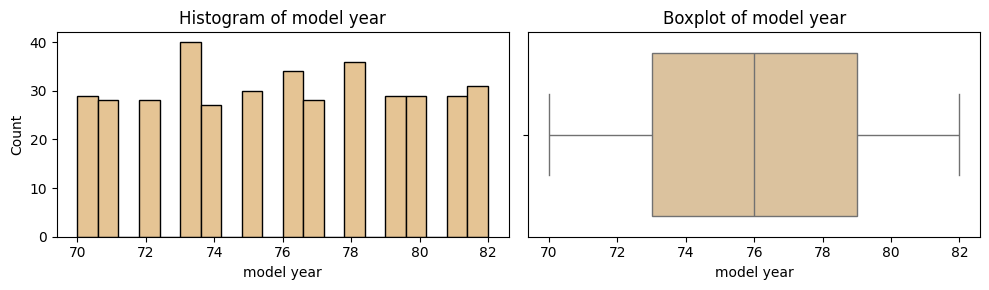

In [ ]:
# Checking the distribution and outliers for each column in the data

colors = sns.color_palette("Set2", len(df.columns))


for i, col in enumerate(df.columns):
    print(col)
    print('Skew:', round(df[col].skew(), 2))

    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color=colors[i % len(colors)])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

---
**Key Observations from Data Summary**

* Fuel Efficiency:
The mpg column has a mean of ~23, closely aligned with the median — indicating a relatively symmetric distribution.

* Engine Configuration:
Cars range from 3 to 8 cylinders, suggesting diverse engine types in the dataset.

* Displacement Variability:
The displacement column shows a high standard deviation, indicating significant variation in engine size.

* Vehicle Weight:
The average car weighs approximately 2,970 lbs.

* Acceleration:
The acceleration values are symmetrically distributed, with both mean and median around 15.5 seconds.

* Model Years:
The dataset includes vehicles produced between 1970 and 1982.
---

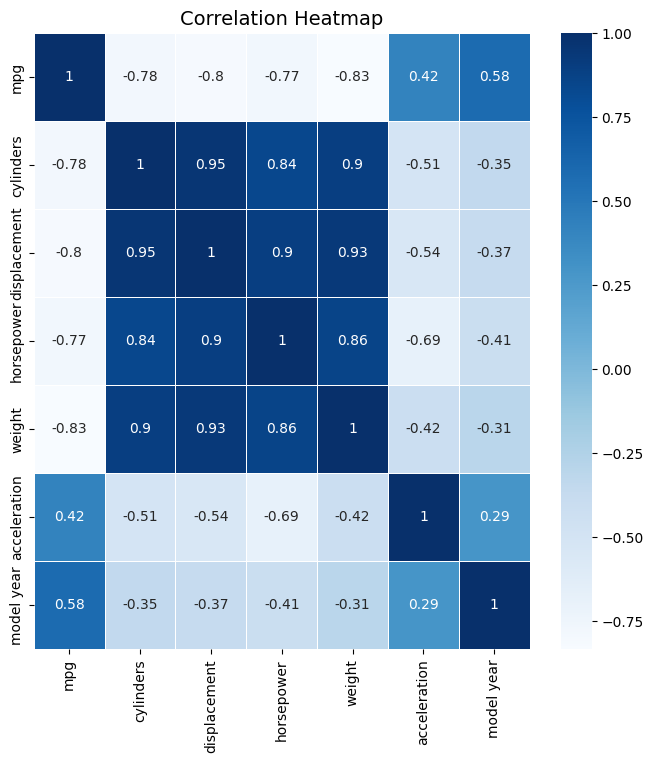

In [ ]:
plt.figure(figsize=(8, 8))

# Use a distinguishable blue gradient color map
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=0.5, linecolor='white')

plt.title('Correlation Heatmap', fontsize=14)
plt.show()

---
**Correlation Highlights**

* MPG is negatively correlated with Cylinders, Displacement, Horsepower, and Weight
→ More powerful and heavier cars are less fuel-efficient.

* Horsepower and Acceleration are negatively correlated
→ Higher horsepower leads to faster acceleration.

* Weight is positively correlated with Horsepower, Displacement, and Cylinders
→ Heavier cars tend to have larger engines.

* Model Year is positively correlated with MPG
→ Newer cars are generally more fuel-efficient.
---

## **Scaling the Data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


---
**Purpose of Standardization**

* All features are on the same scale, so no single variable dominates distance-based models like K-Means, KNN, or PCA.
* Preventing Scale Bias: Variables with larger numerical ranges (e.g., weight in pounds) won't overshadow smaller-scale features (e.g., acceleration in seconds).
* Improveing Optimization Stability: Speeds up convergence and increases stability in algorithms that rely on gradient descent, such as logistic regression and neural networks.
---

# **Dimensionality Reduction Analysis Using PCA and t-SNE**

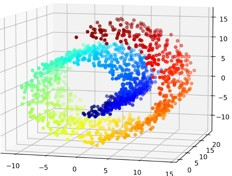

In [ ]:
# Define the number of principal components to extract
n = df_scaled.shape[1]

# Apply PCA to extract principal components (random_state=1 for reproducibility)
pca = PCA(n_components=n, random_state=1)

# Fit PCA on the scaled data and transform it to principal components
df_pca = pca.fit_transform(df_scaled)
df_pca1 = pd.DataFrame(df_pca)

# Display the percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

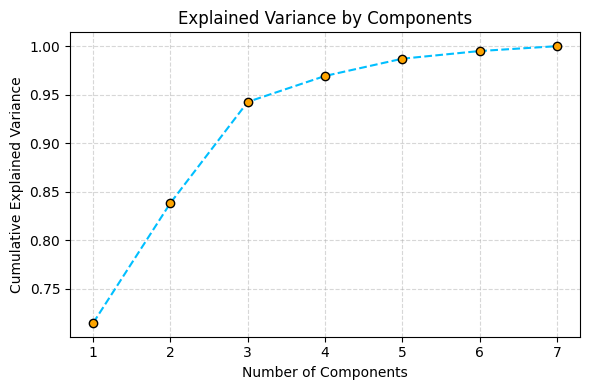

In [ ]:
# Visualize the cumulative explained variance for each principal component
plt.figure(figsize=(6, 4))

plt.plot(range(1, 8), exp_var.cumsum(),
         marker='o',
         linestyle='--',
         color='deepskyblue',
         markerfacecolor='orange',
         markeredgecolor='black')

plt.title("Explained Variance by Components", fontsize=12)
plt.xlabel("Number of Components", fontsize=10)
plt.ylabel("Cumulative Explained Variance", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Identify the minimum number of principal components that explain over 90% of the variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Count of PCs explaining ≥90% of variance: ", ix + 1)
        break

Count of PCs explaining ≥90% of variance:  3


In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

df_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = df_scaled.columns)

df_pca.T

,PC1,PC2,PC3
mpg,-0.40,0.21,-0.26
cylinders,0.42,0.19,0.14
displacement,0.43,0.18,0.10
horsepower,0.42,0.09,-0.17
weight,0.41,0.22,0.28
acceleration,-0.28,-0.02,0.89
model year,-0.23,0.91,-0.02


---
**PCA Summary**

* The original 7 features were reduced to 3 principal components using PCA.
* These 3 components capture ~90% of the total variance in the dataset.
* Less than 10% of the original variance is lost, with minimal information loss for downstream analysis.
---

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
def highlight_correlation(val):
    if val <= -0.40:
        return 'background-color: lightcoral; color: black; font-weight: bold'
    elif val >= 0.40:
        return 'background-color: lightskyblue; color: black; font-weight: bold'
    else:
        return ''

# Apply styling to transposed PCA components for readability
df_pca.T.style.applymap(highlight_correlation)


,PC1,PC2,PC3
mpg,-0.400000,0.210000,-0.260000
cylinders,0.420000,0.190000,0.140000
displacement,0.430000,0.180000,0.100000
horsepower,0.420000,0.090000,-0.170000
weight,0.410000,0.220000,0.280000
acceleration,-0.280000,-0.020000,0.890000
model year,-0.230000,0.910000,-0.020000


---
**PCA Component Insights**

* PC1 – Performance & Power:
Strongly associated with high values of cylinders, displacement, horsepower, and weight, and negatively correlated with mpg.
→ Captures characteristics typical of high-performance or sports cars,  powerful engines, heavier bodies, and low fuel efficiency.

* PC2 – Vehicle Age:
Negatively correlated with model year.
→ Distinguishes older vehicles, making this component a proxy for the age of the car.
* PC3 – Acceleration:
Strongly correlated with acceleration time (0 to 60 mph).
→ Highlights slower-reacting cars, where high PC3 values indicate poor acceleration performance.
---




#### **Visualize the data in 2 dimensions using the first two principal components**



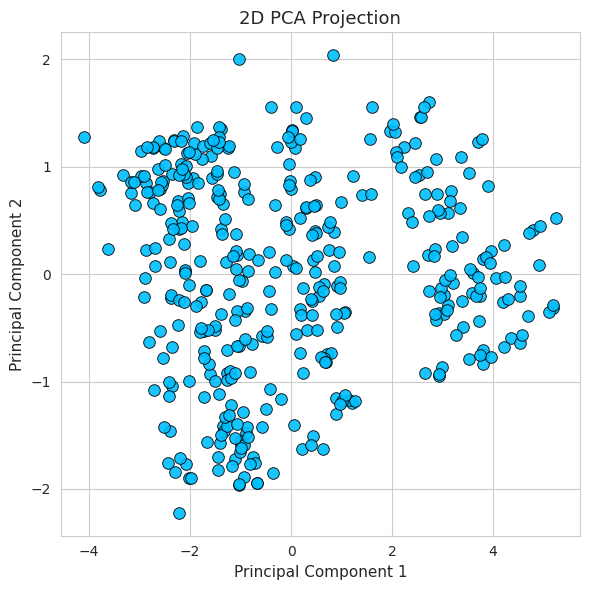

In [ ]:
# Keep only numeric columns

df_numeric = df.select_dtypes(include=[np.number])

# Scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Apply PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df_pca1 = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])


# Visualize in 2D

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca1,
    color='deepskyblue',
    s=70,
    alpha=0.9,
    edgecolor='black'
)

plt.xlabel("Principal Component 1", fontsize=11)
plt.ylabel("Principal Component 2", fontsize=11)
plt.title("2D PCA Projection", fontsize=13)
plt.tight_layout()
plt.show()


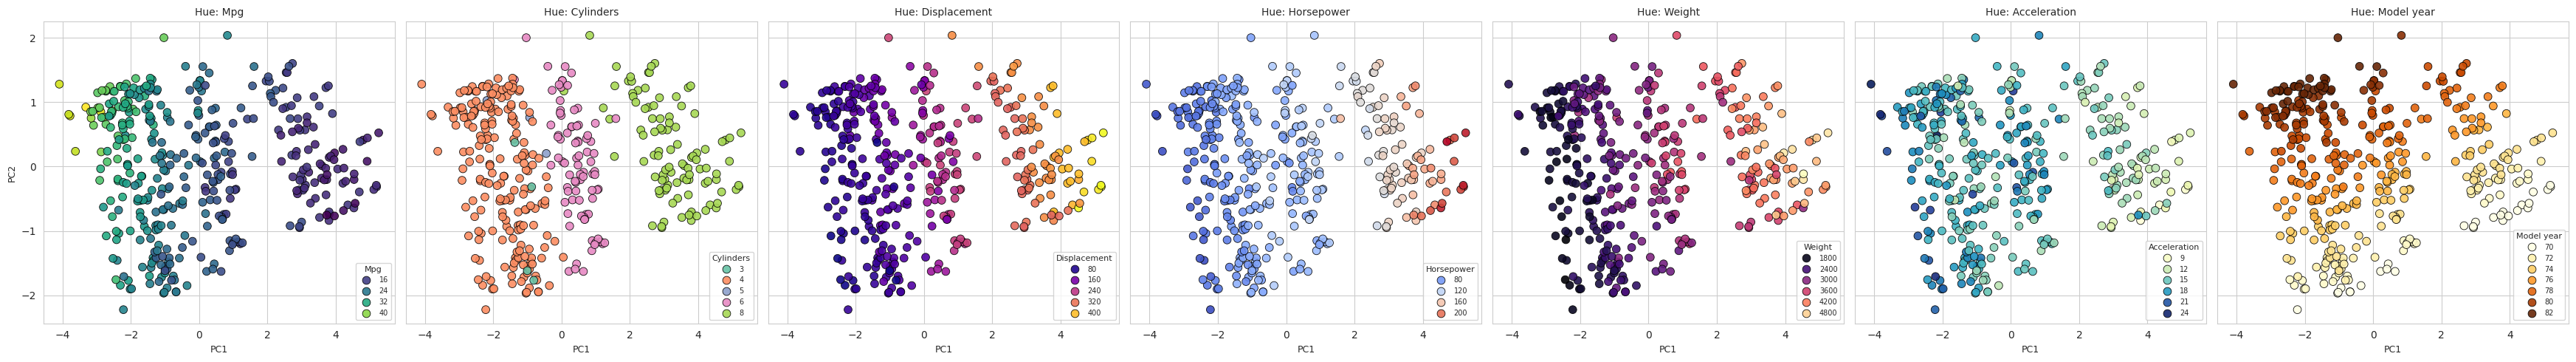

In [ ]:
# Visualize the data in 2D using PCA
# This projection highlights the variance contributed by highly correlated features

# Features and palettes
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
palettes = ['viridis', 'Set2', 'plasma', 'coolwarm', 'magma', 'YlGnBu', 'YlOrBr']

# Set visual style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(5 * len(features), 5), sharex=True, sharey=True)

# Common scatterplot settings
scatter_kwargs = dict(
    x=df_pca1['PC1'],
    y=df_pca1['PC2'],
    edgecolor='black',
    s=60,
    alpha=0.9
)

# Generate plots
for i, (feature, palette) in enumerate(zip(features, palettes)):
    sns.scatterplot(
        data=df,
        hue=feature,
        palette=palette,
        ax=axes[i],
        **scatter_kwargs
    )
    axes[i].set_title(f"Hue: {feature.capitalize()}", fontsize=10)
    axes[i].set_xlabel("PC1", fontsize=9)
    axes[i].set_ylabel("PC2" if i == 0 else "", fontsize=9)
    axes[i].legend(loc='lower right', fontsize=7, title=feature.capitalize(), title_fontsize=8)

plt.tight_layout()
plt.show()

---
**Final Insight**
* Clear separation across PC1: The PCA projection shows noticeable clustering/separation along Principal Component 1 (PC1), suggesting that this component captures substantial variance related to the engine and performance features.

* Strong grouping by engine specs: Cylinders, displacement, horsepower, and weight show well-defined horizontal groupings.

* Vehicles with higher cylinders, displacement, and horsepower are clustered on the right side of PC1, while lighter, more fuel-efficient cars are on the left side. This supports that PC1 is highly correlated with engine size and performance.

* Fuel efficiency (MPG) trend: There’s a clear gradient in MPG across PC1. High-MPG vehicles (efficient cars) group on the left, whereas low-MPG (gas guzzlers) vehicles group on the right.This inverse relationship between MPG and engine size is expected and confirms strong explanatory power of PC1.

* Acceleration and model year: These features show less distinct separation, suggesting they contribute less to PC1 and PC2. However, model year still shows a loose gradient—newer models tend to spread more toward the center and right, possibly indicating gradual performance improvement over time.
---


## **t-SNE**

In [ ]:

# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Scale the numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)

# Create a DataFrame for the t-SNE result
df_tsne = pd.DataFrame(data_tsne, columns=['Component 1', 'Component 2'])

df_tsne.head()


,Component 1,Component 2
0,36.707752,-2.108404
1,37.192513,-0.058722
2,37.241322,-1.185374
3,36.654381,-1.296686
4,37.348392,-1.658431


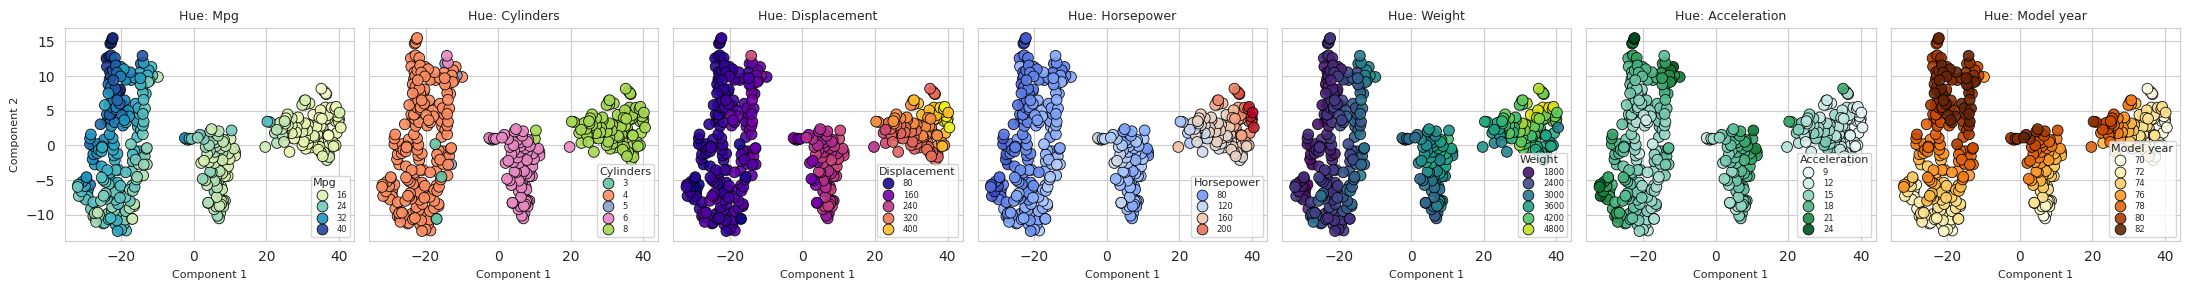

In [ ]:
# Combine with original numeric data for plotting
df_combined = pd.concat([df_tsne, df_numeric.reset_index(drop=True)], axis=1)

# Define variables to plot and assign unique color palettes
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

palette_map = {
    'mpg': 'YlGnBu',
    'cylinders': 'Set2',
    'displacement': 'plasma',
    'horsepower': 'coolwarm',
    'weight': 'viridis',
    'acceleration': 'BuGn',
    'model year': 'YlOrBr'
}

# Create subplots: 1 row, n columns
fig, axes = plt.subplots(1, len(features), figsize=(22, 3), sharex=True, sharey=True)
sns.set_style("whitegrid")

# Plot each t-SNE projection with different hue
for ax, feature in zip(axes, features):
    palette = palette_map.get(feature, 'viridis')
    sns.scatterplot(
        data=df_combined,
        x='Component 1',
        y='Component 2',
        hue=feature,
        palette=palette,
        edgecolor='black',
        s=60,
        alpha=0.9,
        ax=ax
    )
    ax.set_title(f"Hue: {feature.capitalize()}", fontsize=9)
    ax.set_xlabel("Component 1", fontsize=8)
    ax.set_ylabel("Component 2" if feature == features[0] else "", fontsize=8)

    # Legend in lower right
    legend = ax.legend(
        title=feature.capitalize(),
        loc='lower right',
        bbox_to_anchor=(1, 0),
        prop={'size': 6},
        title_fontsize='8',
        labelspacing=0.3,
        borderpad=0.3
    )
    legend._legend_box.align = "left"

plt.tight_layout()
plt.show()

---
**Key Findings from t-SNE**

* Distinct Clusters Detected: The t-SNE projection reveals three well-separated clusters in 2D space, confirming non-linear patterns not fully captured by PCA.

* MPG Segmentation: Vehicles with higher MPG form a distinct cluster, clearly separated from those with lower fuel efficiency. Suggests strong differentiation potential in marketing high-MPG cars.

* Cylinders & Displacement: Fewer cylinders (3–4) cluster together, while higher cylinder counts (6–8) dominate separate regions—matching with displacement patterns. This confirms engine size and configuration as primary cluster drivers.

* Horsepower and Weight: Lower-powered, lighter vehicles group tightly and align with high-MPG clusters. Indicates strong correlation among weight, power, and efficiency.

* Model Year Influence: Newer vehicles (late 70s to early 80s) cluster away from older models—demonstrating technological and design evolution over time.
---

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

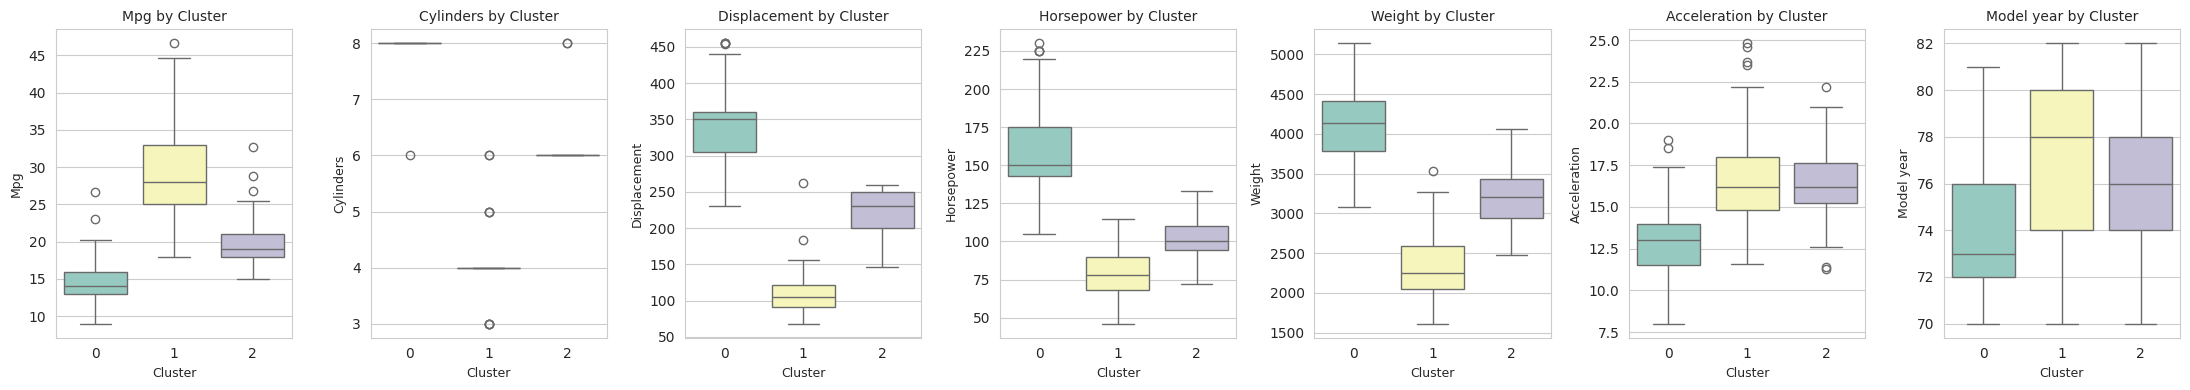

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
df_combined['cluster'] = kmeans.fit_predict(df_tsne)

# Step 1: Set visual style
sns.set_style("whitegrid")

# Step 2: Define features and palettes
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
palette = sns.color_palette("Set3")  # Brighter palette for boxplots

# Step 3: Create subplots (1 row for horizontal layout)
fig, axes = plt.subplots(1, len(features), figsize=(22, 4), sharey=False)

# Step 4: Create a boxplot for each feature
for ax, feature in zip(axes, features):
    sns.boxplot(
        x='cluster',
        y=feature,
        data=df_combined,
        ax=ax,
        palette=palette
    )
    ax.set_title(f'{feature.capitalize()} by Cluster', fontsize=10)
    ax.set_xlabel("Cluster", fontsize=9)
    ax.set_ylabel(feature.capitalize(), fontsize=9)

# Step 5: Layout adjustment
plt.tight_layout()
plt.show()

---
**Box Plot Insights by Cluster**

* **Cluster 0**: Characterized by low MPG, high displacement, high horsepower, and heavier weight. Likely represents older, performance-focused or less fuel-efficient cars.

* **Cluster 1**: Represents mid-range efficiency with moderate acceleration and light-to-mid weight. Possibly family sedans or general-purpose vehicles.

* **Cluster 2**: Includes high-MPG, low-cylinder, lightweight cars—typically newer and compact. Ideal target for eco-conscious or cost-sensitive consumers.
---

# **Executive Recommendations**

* **Segment Definition & Product Positioning**

  Leverage the identified clusters to establish data-driven product segments such as "Efficient & Compact", "Balanced Mid-Range", and "Power & Performance". These groupings provide a clear framework for differentiated go-to-market strategies and pricing tiers.

* **Precision Customer Targeting**
  
  Align vehicle clusters with defined customer personas to enable more precise marketing campaigns. For example, high-MPG, lightweight clusters can be mapped to urban commuters or environmentally conscious buyers, enhancing relevance and conversion rates.

* **Data-Driven Inventory Optimization**
  
  Inform regional and seasonal inventory decisions by aligning cluster characteristics with environmental and demographic factors (e.g., stocking higher-weight vehicles in colder or rural regions where performance and durability are prioritized).

* **Advanced Modeling Enablement**
  
  Integrate cluster assignments as engineered features into predictive models, supporting use cases such as dynamic pricing, demand forecasting, and residual value estimation. This layered insight can strengthen model explainability and performance.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Dimensionality Reduction Analysis_Autompg"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Dimensionality Reduction Analysis_Autompg to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 2550982 bytes to /content/drive/MyDrive/Colab Notebooks/Dimensionality Reduction Analysis_Automp.html
